In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read dataset
df = pd.read_csv('data_porto_2.csv')
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
#cek Inconsistent dan Missing Value data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
#cek outlier
#mengambil kolom yang bukan tipe data object
non_categorical_columns = df.select_dtypes(include=[np.number]).columns
non_categorical_columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<Axes: >

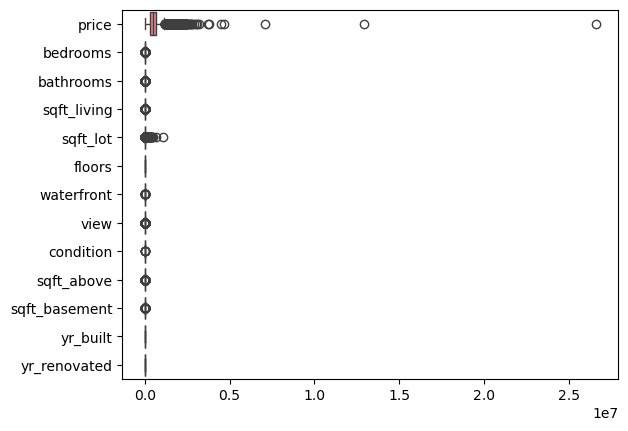

In [8]:
#cek outlier
#cek dengan boxplot

plt.figure()
sns.boxplot(data=df[non_categorical_columns], orient='h')


In [10]:
#cek outlier
#menghilangkan outlier dengan metode IQR

def remove_outlier(df1, columns):
    for col in columns:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR

        df1 = df1[(df1[col] >= batas_bawah) & (df1[col] <= batas_atas)]
    return df1

df_outlier_removed = remove_outlier(df, non_categorical_columns)


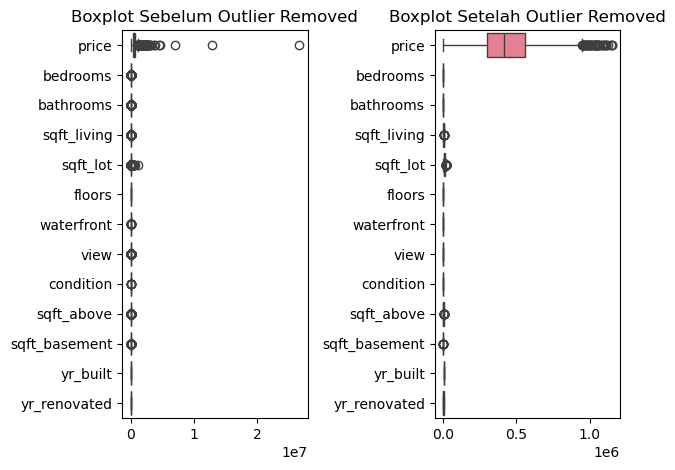

In [12]:
#cek outlier
#hasil boxplot setelah outlier dihapus

plt.figure()

plt.subplot(1,2,1)
sns.boxplot(data=df[non_categorical_columns], orient='h')
plt.title('Boxplot Sebelum Outlier Removed')


plt.subplot(1,2,2)
sns.boxplot(data=df_outlier_removed[non_categorical_columns], orient='h')
plt.title('Boxplot Setelah Outlier Removed')

plt.tight_layout() #agar boxplot tidak bertumpuk
plt.show()


In [13]:
#cek outlier
#cek info setelah removed outlier

df_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3316 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3316 non-null   object 
 1   price          3316 non-null   float64
 2   bedrooms       3316 non-null   float64
 3   bathrooms      3316 non-null   float64
 4   sqft_living    3316 non-null   int64  
 5   sqft_lot       3316 non-null   int64  
 6   floors         3316 non-null   float64
 7   waterfront     3316 non-null   int64  
 8   view           3316 non-null   int64  
 9   condition      3316 non-null   int64  
 10  sqft_above     3316 non-null   int64  
 11  sqft_basement  3316 non-null   int64  
 12  yr_built       3316 non-null   int64  
 13  yr_renovated   3316 non-null   int64  
 14  street         3316 non-null   object 
 15  city           3316 non-null   object 
 16  statezip       3316 non-null   object 
 17  country        3316 non-null   object 
dtypes: float64(4)

In [16]:
#cek data duplikasi dari data yang sudah remove oulier

df_outlier_removed.duplicated(subset=['street'])

0       False
2       False
3       False
4       False
5       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 3316, dtype: bool

In [18]:
#cari data dengan nilai terbesar di setiap kolom
data_terbesar = df_outlier_removed.max()
data_terbesar


date             2014-07-10 00:00:00
price                      1150000.0
bedrooms                         5.0
bathrooms                        3.5
sqft_living                     3910
sqft_lot                       18362
floors                           3.5
waterfront                         0
view                               0
condition                          5
sqft_above                      3340
sqft_basement                   1250
yr_built                        2014
yr_renovated                    2014
street             Valley View Trail
city                    Yarrow Point
statezip                    WA 98354
country                          USA
dtype: object

In [20]:
#cari data dengan nilai terkecil di setiap kolom
data_terkecil = df_outlier_removed.min()
data_terkecil


date             2014-05-02 00:00:00
price                            0.0
bedrooms                         2.0
bathrooms                       0.75
sqft_living                      580
sqft_lot                         681
floors                           1.0
waterfront                         0
view                               0
condition                          2
sqft_above                       580
sqft_basement                      0
yr_built                        1900
yr_renovated                       0
street                  1 View Ln NE
city                          Algona
statezip                    WA 98001
country                          USA
dtype: object

In [193]:
#rekomendasi rumah sesuai ketentuan
rek_rumah = df_outlier_removed[((df_outlier_removed['yr_built'] >= 1990) 
            | (df_outlier_removed['yr_renovated'] > 2000))
            & (df_outlier_removed['price'] < 1150000.0)
            & (df_outlier_removed['bedrooms'] == 5.0)
            & (df_outlier_removed['bathrooms'] == 3.5)]

rek_rumah_sorted_harga = rek_rumah.sort_values(by='price', ascending=True)
rek_rumah_sorted_harga

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4542,2014-06-25 00:00:00,0.0,5.0,3.5,2640,6895,2.0,0,0,3,2640,0,2001,0,34529 SE Jay Ct,Snoqualmie,WA 98065,USA
2296,2014-06-11 00:00:00,295000.0,5.0,3.5,2100,5107,2.0,0,0,3,1410,690,1999,0,10026 61st Ave S,Seattle,WA 98178,USA
1028,2014-05-20 00:00:00,345600.0,5.0,3.5,2800,5120,2.5,0,0,3,2800,0,1903,2005,352 17th Ave,Seattle,WA 98122,USA
2650,2014-06-17 00:00:00,379900.0,5.0,3.5,2800,7350,2.0,0,0,3,2800,0,1995,0,8430 8th Ave SW,Seattle,WA 98106,USA
1212,2014-05-22 00:00:00,380000.0,5.0,3.5,2420,4670,2.0,0,0,3,2420,0,2013,1923,8803 38th Ave S,Seattle,WA 98118,USA
4483,2014-06-12 00:00:00,437500.0,5.0,3.5,3690,11928,2.0,0,0,3,2540,1150,2006,0,114 210th Ave NE,Sammamish,WA 98074,USA
3427,2014-06-26 00:00:00,690000.0,5.0,3.5,2720,7598,2.0,0,0,3,1860,860,1993,0,8921 42nd Ave NE,Seattle,WA 98115,USA
2631,2014-06-17 00:00:00,866059.0,5.0,3.5,3130,4797,2.0,0,0,3,2570,560,2014,0,15845 SE 44th Ct,Bellevue,WA 98006,USA
3149,2014-06-23 00:00:00,905000.0,5.0,3.5,3500,10155,2.0,0,0,3,2570,930,1996,0,15563 SE 67th Pl,Bellevue,WA 98006,USA
1897,2014-06-04 00:00:00,989000.0,5.0,3.5,3280,4000,2.0,0,0,3,2440,840,2003,0,8309 30th Ave NW,Seattle,WA 98117,USA


In [213]:
#membandingkan kolom yr_built dan yr_renovated

banding_tahun = ((rek_rumah_sorted_harga['yr_renovated'] == 0) & 
                 (rek_rumah_sorted_harga['yr_renovated'] >= 
                  rek_rumah_sorted_harga['yr_built'])) | (
                 (rek_rumah_sorted_harga['yr_renovated'] != 0) & 
                 (rek_rumah_sorted_harga['yr_renovated'] <=
                 rek_rumah_sorted_harga['yr_built']))
banding_tahun

4542    False
2296    False
1028    False
2650    False
1212     True
4483    False
3427    False
2631    False
3149    False
1897    False
dtype: bool

In [215]:
#menghapus inkonsisten data

rek_rumah_hapus_inkonsisten = rek_rumah.drop(rek_rumah[banding_tahun].index)
rek_rumah_hapus_inkonsisten

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17128\3925965362.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rek_rumah_hapus_inkonsisten = rek_rumah.drop(rek_rumah[banding_tahun].index)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1028,2014-05-20 00:00:00,345600.0,5.0,3.5,2800,5120,2.5,0,0,3,2800,0,1903,2005,352 17th Ave,Seattle,WA 98122,USA
1897,2014-06-04 00:00:00,989000.0,5.0,3.5,3280,4000,2.0,0,0,3,2440,840,2003,0,8309 30th Ave NW,Seattle,WA 98117,USA
2296,2014-06-11 00:00:00,295000.0,5.0,3.5,2100,5107,2.0,0,0,3,1410,690,1999,0,10026 61st Ave S,Seattle,WA 98178,USA
2631,2014-06-17 00:00:00,866059.0,5.0,3.5,3130,4797,2.0,0,0,3,2570,560,2014,0,15845 SE 44th Ct,Bellevue,WA 98006,USA
2650,2014-06-17 00:00:00,379900.0,5.0,3.5,2800,7350,2.0,0,0,3,2800,0,1995,0,8430 8th Ave SW,Seattle,WA 98106,USA
3149,2014-06-23 00:00:00,905000.0,5.0,3.5,3500,10155,2.0,0,0,3,2570,930,1996,0,15563 SE 67th Pl,Bellevue,WA 98006,USA
3427,2014-06-26 00:00:00,690000.0,5.0,3.5,2720,7598,2.0,0,0,3,1860,860,1993,0,8921 42nd Ave NE,Seattle,WA 98115,USA
4483,2014-06-12 00:00:00,437500.0,5.0,3.5,3690,11928,2.0,0,0,3,2540,1150,2006,0,114 210th Ave NE,Sammamish,WA 98074,USA
4542,2014-06-25 00:00:00,0.0,5.0,3.5,2640,6895,2.0,0,0,3,2640,0,2001,0,34529 SE Jay Ct,Snoqualmie,WA 98065,USA


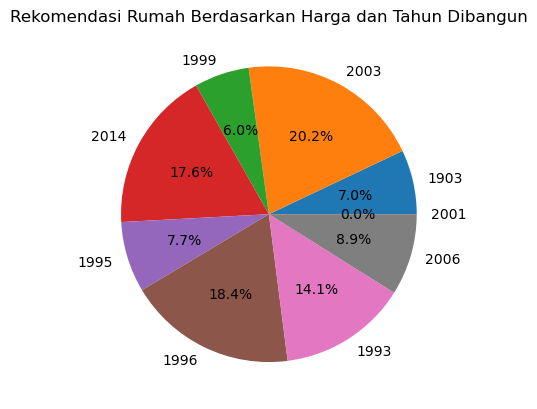

In [217]:
#visualisasi dg pie chart

plt.title('Rekomendasi Rumah Berdasarkan Harga dan Tahun Dibangun')
plt.pie('price', labels='yr_built', data=rek_rumah_hapus_inkonsisten, autopct='%1.1f%%');


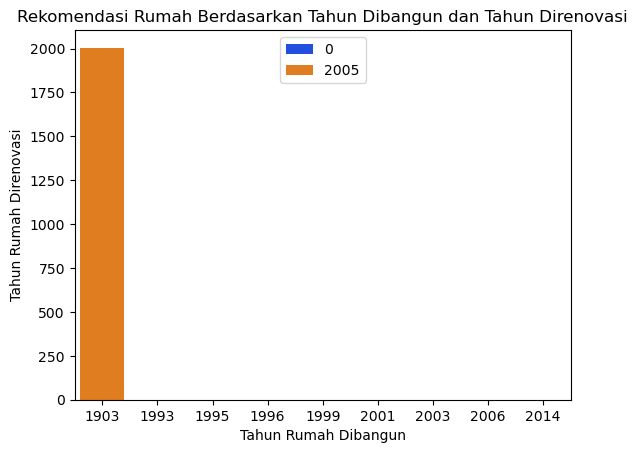

In [219]:
#barchart

plt.figure() 
sns.barplot(x='yr_built', y='yr_renovated', hue='yr_renovated', 
            data=rek_rumah_hapus_inkonsisten, palette='bright')

plt.xlabel('Tahun Rumah Dibangun')
plt.ylabel('Tahun Rumah Direnovasi')
plt.title('Rekomendasi Rumah Berdasarkan Tahun Dibangun dan Tahun Direnovasi')
plt.legend(loc='upper center')
